In [1]:
import sys
#!{sys.executable} -m pip install pymongo
#!{sys.executable} -m pip install pyyaml
#!{sys.executable} -m pip install matplotlib
#!{sys.executable} -m pip install scipy
#!{sys.executable} -m pip install pandas
#!{sys.executable} -m pip install isoweek

In [2]:

import os
print(os.getcwd())
# Get Mongo database
from yaml import load
from pymongo import MongoClient
from getsecret import getsecret

client = MongoClient(getsecret("MONGODB_URI"))
db = client[getsecret("MOBILE_NAME")]
ext_client = MongoClient(getsecret("EXT_URI"))

ext_db = ext_client[getsecret("DB_NAME")]
# Get all synced accounts and their respective users.
import urllib.request as req
import json
accounts = json.loads(req.urlopen("http://localhost:5000/synced_emails").read().decode("utf-8"))


### CONSTANTS ###
INTENSITY = "intensity"
TOTAL_TIME = "total_time"
ANDROID = "android"
HASH = "email_hash"
INSTALL = "install_id"
GOALS = "goals"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
OTHER_TIME = "other_time"
FREQ_TIME ="freq_time"
GOAL_TIME = "goal_time"
TARGET_TIME = "target_time"
BROWSER = "browser"
BROWSER_DOMAIN = "browser_domain"
GOAL_TIMES = "goal_frequency_days"
FREQ_GOALS = "freq_goals"
INFREQ_GOALS = "infreq_goals"
BROWSER = "browser"
FREQUENCY = "frequency"
TIME = "time"
GOAL = "goal"
SPEND_LESS_TIME_LENGTH = len("custom/spend_less_time_")
AVG_FREQ_TIME = "avg_freq_time"
AVG_INFREQ_TIME = "avg_infreq_time"
AVG_GOAL_TIME = "avg_goal_time"
UNPRODUCTIVE_TIME = "unproductive_time"
PRODUCTIVE_TIME = "productive_time"
INFREQ_TIME = "infreq_time"
NUM_FREQ_GOALS = "num_freq_goals"
NUM_INFREQ_GOALS = "num_infreq_goals"
import time


### FUNCTIONS ###
# Get freq stats
# week -> goal -> freq
# Top-level-domain-names that are not pertinent to the application.
TLDs = ['aaa', 'abb', 'abc', 'ac', 'aco', 'ad', 'ads', 'ae', 'aeg', 'af', 'afl', 'ag', 'ai', 'aig', 'al', 'am', 'anz', 'ao', 'aol', 'app', 'aq', 'ar', 'art', 'as', 'at', 'au', 'aw', 'aws', 'ax', 'axa', 'az', 'ba', 'bar', 'bb', 'bbc', 'bbt', 'bcg', 'bcn', 'bd', 'be', 'bet', 'bf', 'bg', 'bh', 'bi', 'bid', 'bio', 'biz', 'bj', 'bm', 'bms', 'bmw', 'bn', 'bnl', 'bo', 'bom', 'boo', 'bot', 'box', 'br', 'bs', 'bt', 'buy', 'bv', 'bw', 'by', 'bz', 'bzh', 'ca', 'cab', 'cal', 'cam', 'car', 'cat', 'cba', 'cbn', 'cbs', 'cc', 'cd', 'ceb', 'ceo', 'cf', 'cfa', 'cfd', 'cg', 'ch', 'ci', 'ck', 'cl', 'cm', 'cn', 'co', 'com', 'cr', 'crs', 'csc', 'cu', 'cv', 'cw', 'cx', 'cy', 'cz', 'dad', 'day', 'dds', 'de', 'dev', 'dhl', 'diy', 'dj', 'dk', 'dm', 'dnp', 'do', 'dog', 'dot', 'dtv', 'dvr', 'dz', 'eat', 'ec', 'eco', 'edu', 'ee', 'eg', 'er', 'es', 'esq', 'et', 'eu', 'eus', 'fan', 'fi', 'fit', 'fj', 'fk', 'fly', 'fm', 'fo', 'foo', 'fox', 'fr', 'frl', 'ftr', 'fun', 'fyi', 'ga', 'gal', 'gap', 'gb', 'gd', 'gdn', 'ge', 'gea', 'gf', 'gg', 'gh', 'gi', 'gl', 'gle', 'gm', 'gmo', 'gmx', 'gn', 'goo', 'gop', 'got', 'gov', 'gp', 'gq', 'gr', 'gs', 'gt', 'gu', 'gw', 'gy', 'hbo', 'hiv', 'hk', 'hkt', 'hm', 'hn', 'hot', 'how', 'hr', 'ht', 'hu', 'ibm', 'ice', 'icu', 'id', 'ie', 'ifm', 'il', 'im', 'in', 'inc', 'ing', 'ink', 'int', 'io', 'iq', 'ir', 'is', 'ist', 'it', 'itv', 'jcb', 'jcp', 'je', 'jio', 'jlc', 'jll', 'jm', 'jmp', 'jnj', 'jo', 'jot', 'joy', 'jp', 'ke', 'kfh', 'kg', 'kh', 'ki', 'kia', 'kim', 'km', 'kn', 'kp', 'kpn', 'kr', 'krd', 'kw', 'ky', 'kz', 'la', 'lat', 'law', 'lb', 'lc', 'lds', 'li', 'lk', 'llc', 'lol', 'lpl', 'lr', 'ls', 'lt', 'ltd', 'lu', 'lv', 'ly', 'ma', 'man', 'map', 'mba', 'mc', 'md', 'me', 'med', 'men', 'mg', 'mh', 'mil', 'mit', 'mk', 'ml', 'mlb', 'mls', 'mm', 'mma', 'mn', 'mo', 'moe', 'moi', 'mom', 'mov', 'mp', 'mq', 'mr', 'ms', 'msd', 'mt', 'mtn', 'mtr', 'mu', 'mv', 'mw', 'mx', 'my', 'mz', 'na', 'nab', 'nba', 'nc', 'ne', 'nec', 'net', 'new', 'nf', 'nfl', 'ng', 'ngo', 'nhk', 'ni', 'nl', 'no', 'now', 'np', 'nr', 'nra', 'nrw', 'ntt', 'nu', 'nyc', 'nz', 'obi', 'off', 'om', 'one', 'ong', 'onl', 'ooo', 'org', 'ott', 'ovh', 'pa', 'pay', 'pe', 'pet', 'pf', 'pg', 'ph', 'phd', 'pid', 'pin', 'pk', 'pl', 'pm', 'pn', 'pnc', 'pr', 'pro', 'pru', 'ps', 'pt', 'pub', 'pw', 'pwc', 'py', 'qa', 'qvc', 're', 'red', 'ren', 'ril', 'rio', 'rip', 'ro', 'rs', 'ru', 'run', 'rw', 'rwe', 'sa', 'sap', 'sas', 'sb', 'sbi', 'sbs', 'sc', 'sca', 'scb', 'sd', 'se', 'ses', 'sew', 'sex', 'sfr', 'sg', 'sh', 'si', 'sj', 'sk', 'ski', 'sky', 'sl', 'sm', 'sn', 'so', 'soy', 'sr', 'srl', 'srt', 'st', 'stc', 'su', 'sv', 'sx', 'sy', 'sz', 'tab', 'tax', 'tc', 'tci', 'td', 'tdk', 'tel', 'tf', 'tg', 'th', 'thd', 'tj', 'tjx', 'tk', 'tl', 'tm', 'tn', 'to', 'top', 'tr', 'trv', 'tt', 'tui', 'tv', 'tvs', 'tw', 'tz', 'ua', 'ubs', 'ug', 'uk', 'uno', 'uol', 'ups', 'us', 'uy', 'uz', 'va', 'vc', 've', 'vet', 'vg', 'vi', 'vig', 'vin', 'vip', 'vn', 'vu', 'wed', 'wf', 'win', 'wme', 'wow', 'ws', 'wtc', 'wtf', 'xin', 'xxx', 'xyz', 'ye', 'you', 'yt', 'yun', 'za', 'zip', 'zm', 'zw']
def get_name(name, device):
    """
    @param name: goal name (package name for Android)
    @param device: "android" or "browser" or "browser_domain"
    @return name of goal with subdomains removed and goal annotation removed (i.e. spend_less_time)
    """
    if device == ANDROID  and name =="com.google.android.gm" or device == BROWSER and "gmail" in name:
        return "gmail"
    name = name.lower()
    if "custom" in name and device == BROWSER:
        # strip off the "custom/spend_less_time_"
        name = name[SPEND_LESS_TIME_LENGTH:]
    elif device == BROWSER:
        return name.split('/spend')[0]
    # Now we have to get juicy part of domain.
    subs = list(filter(lambda x: x != "android" and x != "google" and x != "apps" and x not in TLDs, name.split('.')))
    if device == ANDROID: 
        if len(subs) > 0:
            return subs[0]
        return name
    else:
        if len(subs) > 0:
            return subs[len(subs) - 1]    
        
def get_freq_stats(user):
    """
    Gets the frequency stats for browser.
    :param user user id 
    :return {week: {FREQ_GOALS: set(), INFREQ_GOALS: set()}}
    """
    stat = {}
    for setting in ext_db[user + "_synced:goal_frequencies"].find():
        val = json.loads(setting["val"])
        if val["algorithm"] == "isoweek_random":
            isoWeek = int(datetime.fromtimestamp(setting["timestamp_local"]/1000 + 8 * (60 ** 2)).isocalendar()[1])
            currentIsoWeek = int(datetime.fromtimestamp(time.time()).isocalendar()[1])
            for week in range(isoWeek, currentIsoWeek + 1):
                if str(week) not in stat:
                    stat[str(week)] = {FREQ_GOALS: set([]), INFREQ_GOALS: set([])}
                if val["onweeks"][week] == 1:
                    stat[str(week)][FREQ_GOALS].add(get_name(setting["key"], BROWSER))
                else:
                    stat[str(week)][INFREQ_GOALS].add(get_name(setting["key"], BROWSER))
    return stat


/home/geza/habitlab-data-analysis


In [3]:
%load_ext rpy2.ipython

In [4]:
# Now, let's get the mapping from productive apps to unproductive ones.
from statistics import mode, median, StatisticsError
name_to_prod = {}
with open('domain_to_productivity.json', 'r') as f:
    domain_to_prod = json.load(f)
    for domain in domain_to_prod:
        name = get_name(domain, BROWSER_DOMAIN)
        if name not in name_to_prod: 
            name_to_prod[name] = []
        name_to_prod[name].append(domain_to_prod[domain])
for name in name_to_prod:
    try:
        name_to_prod[name] = mode(name_to_prod[name])
    except StatisticsError:
        name_to_prod[name] = median(name_to_prod[name])

In [5]:
# Now, for each day, get frequency intensity
day_stats = []
import math
import moment
for account in accounts:
    curr_date = ""
    day_data = {PRODUCTIVE_TIME: 0, UNPRODUCTIVE_TIME: 0,INTENSITY: 0, INFREQ_GOALS: set([]), TARGET_TIME:0,
                FREQ_TIME: 0, TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), 
                FREQ_GOALS: set([]), OTHER_TIME: 0, INSTALL: '' }
    for user in account[ANDROID]:
        day_data[INSTALL] = user
        for s in db[user+ "_sessions"].find({"enabled": {"$exists": True}, "duration": {"$lt": 86400}}):
            if (s["duration"] <= 0):
              continue
            time = moment.unix(s["timestamp"])
            date = time.format("YYYY-MM-DD")
            if date != curr_date:
                if curr_date != "" and day_data[TOTAL_TIME] > 0 and len(day_data[GOALS]) > 0 and day_data[GOAL_TIME] > 0 and day_data[OTHER_TIME] > 0:
                    # Add obj and reset data
                    # take logs of time cuz time is log-norm distributed
                    # Have a more clever way of determining intensity: the % time spent on freq goals
                    for key in day_data:
                        if "time" in key and day_data[key] > 0:
                            day_data[key]= math.log(day_data[key])
                    day_stats.append(day_data)
                    day_data = {PRODUCTIVE_TIME: 0, UNPRODUCTIVE_TIME: 0,INTENSITY: 0, INFREQ_GOALS: set([]), TARGET_TIME:0,
                                FREQ_TIME: 0, TOTAL_TIME: 0, GOAL_TIME: 0, HASH: account["_id"], GOALS: set([]), 
                                FREQ_GOALS: set([]), OTHER_TIME: 0, INSTALL: user }
                curr_date = date
            if "enabled" in s:
                if s["enabled"]:
                    day_data[GOALS].add(s["domain"])
                    if s["duration"] > 0:
                        if s["domain"] + "_domain_time" not in day_data:
                            day_data[s["domain"]+"_domain_time"] = 0
                        day_data[s["domain"]+"_domain_time"] += s["duration"]
                    if "frequent" in s and s["frequent"]:
                        day_data[FREQ_TIME] += s["duration"]
                        day_data[FREQ_GOALS].add(s["domain"])
                    elif "frequent" in s:
                        day_data[INFREQ_GOALS].add(s["domain"])
                    day_data[GOAL_TIME] += s["duration"]
                elif "target" in s and s["target"]:
                    day_data[TARGET_TIME] += s["duration"]                        
                else:
                    day_data[OTHER_TIME] += s["duration"]
            name = get_name(s["domain"], ANDROID)
            if name in name_to_prod:
                if name_to_prod[name] > 0:
                    day_data[PRODUCTIVE_TIME] += s["duration"]
                elif name_to_prod[name] < 0:
                    day_data[UNPRODUCTIVE_TIME] += s["duration"]
            day_data[TOTAL_TIME] += (s["duration"])
            

In [6]:
import matplotlib.pyplot as pyplot
pyplot.figure(12)
pyplot.hist([math.exp(day[TOTAL_TIME]) for day in day_stats if math.exp(day[TOTAL_TIME])], bins=20)

(array([2.089e+03, 1.846e+03, 1.073e+03, 7.510e+02, 5.050e+02, 3.030e+02,
        3.100e+02, 4.100e+01, 3.000e+00, 5.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00]),
 array([4.5000000e+01, 1.2592050e+04, 2.5139100e+04, 3.7686150e+04,
        5.0233200e+04, 6.2780250e+04, 7.5327300e+04, 8.7874350e+04,
        1.0042140e+05, 1.1296845e+05, 1.2551550e+05, 1.3806255e+05,
        1.5060960e+05, 1.6315665e+05, 1.7570370e+05, 1.8825075e+05,
        2.0079780e+05, 2.1334485e+05, 2.2589190e+05, 2.3843895e+05,
        2.5098600e+05]),
 <a list of 20 Patch objects>)

In [7]:
import pandas as pd
INFREQ_TIME = "infreq_time"
data_frame_dict = { key: [] for key in day_stats[0] if "domain_time" not in key}
NUM_GOALS = "num_goals"
data_frame_dict[AVG_GOAL_TIME] = []
data_frame_dict[AVG_FREQ_TIME] = []
data_frame_dict[AVG_INFREQ_TIME] = []
data_frame_dict[NUM_GOALS] = []
data_frame_dict[INFREQ_TIME] = []
# Let's also count up the freq to see if they're roughly equal
field_stats = {}
print(len(day_stats))
for item in day_stats:
    if len(item[FREQ_GOALS]) > 0 and item[FREQ_TIME] != item[GOAL_TIME]:
        for key in item:
            #if key == 'install_id':
            #  continue
            #print(key)
            if "domain_time" not in key:
                if key == INTENSITY:
                    data_frame_dict[key].append(len(item[FREQ_GOALS])/len(item[GOALS]))
                    #data_frame_dict[key].append(1-math.exp(item[FREQ_TIME])/math.exp(item[TOTAL_TIME]))
                else:
                    data_frame_dict[key].append((item[key]))
        data_frame_dict[AVG_GOAL_TIME].append(item[GOAL_TIME]/len(item[GOALS]))
        data_frame_dict[AVG_FREQ_TIME].append(item[FREQ_TIME]/len(item[FREQ_GOALS]))
        data_frame_dict[AVG_INFREQ_TIME].append(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS]))
        data_frame_dict[INFREQ_TIME].append(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME])))
        data_frame_dict[NUM_GOALS].append(len(item[GOALS]))
df = pd.DataFrame(data_frame_dict)
print(df)


#mean([len(item[GOALS]) for item in day_stats])
df.to_csv('effect_freq_time_spent_2018_09_10.csv')

6933
      productive_time  unproductive_time  intensity  \
0            7.313220           0.000000   0.333333   
1            4.430817           3.044522   0.500000   
2            5.541264           7.882692   0.333333   
3            5.899897           7.902857   0.666667   
4            5.680173           8.218787   0.666667   
5            6.274762           8.939974   0.800000   
6            4.859812           8.122371   0.250000   
7            7.121252           7.741968   0.333333   
8            6.720220           8.000685   0.500000   
9            5.356586           6.150603   0.500000   
10           5.789960           8.883502   1.000000   
11           6.496775           9.277719   0.750000   
12           6.448889           8.040769   0.666667   
13           6.413459           8.809863   0.750000   
14           5.241747           8.592672   0.750000   
15           4.418841           9.062188   0.200000   
16           4.663439           9.302828   0.800000   
17   

In [8]:
%%R -i df -w 5 -h 5 --units in -r 200

#install.packages('ez')
#install.packages('lme4')

library(lme4)
library(sjPlot)
library(lmerTest)
#library(ez)


/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead

In [9]:
#for index, row in df.iterrows():
#  if row['total_time'] > 12:
#    print(row['email_hash'])

In [10]:
%%R -i df -w 5 -h 5 --units in -r 200

nrow(df)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead

[1] 5006


In [11]:
%%R -i df -w 5 -h 5 --units in -r 200

summary(df)

 productive_time  unproductive_time   intensity       infreq_goals      
 Min.   : 0.000   Min.   : 0.000    Min.   :0.09091   Length:5006       
 1st Qu.: 4.248   1st Qu.: 7.729    1st Qu.:0.37500   Class :character  
 Median : 6.170   Median : 8.668    Median :0.50000   Mode  :character  
 Mean   : 5.914   Mean   : 8.379    Mean   :0.52016                     
 3rd Qu.: 7.977   3rd Qu.: 9.429    3rd Qu.:0.66667                     
 Max.   :11.628   Max.   :11.436    Max.   :1.00000                     
  target_time        freq_time        total_time       goal_time     
 Min.   : 0.0000   Min.   : 0.000   Min.   : 4.159   Min.   : 2.303  
 1st Qu.: 0.0000   1st Qu.: 6.660   1st Qu.: 9.336   1st Qu.: 8.042  
 Median : 0.0000   Median : 7.782   Median : 9.961   Median : 8.745  
 Mean   : 0.9446   Mean   : 7.457   Mean   : 9.880   Mean   : 8.608  
 3rd Qu.: 0.0000   3rd Qu.: 8.592   3rd Qu.:10.618   3rd Qu.: 9.339  
 Max.   :10.4579   Max.   :11.001   Max.   :12.115   Max.   :11.353  

In [12]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: total_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 11452.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.1255 -0.3840  0.1491  0.5447  3.5176 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6536   0.8084  
 Residual               0.4461   0.6679  
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 9.644e+00  4.813e-02 1.316e+03 200.398   <2e-16 ***
intensity   5.079e-02  5.869e-02 4.741e+03   0.865    0.387    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.643


In [13]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
#results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
#summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
results <- lm(total_time ~ intensity, data = df)
summary(results)



Call:
lm(formula = total_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7214 -0.5432  0.0806  0.7377  2.2345 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.881411   0.039835 248.058   <2e-16 ***
intensity   -0.002316   0.071962  -0.032    0.974    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9641 on 5004 degrees of freedom
Multiple R-squared:  2.07e-07,	Adjusted R-squared:  -0.0001996 
F-statistic: 0.001036 on 1 and 5004 DF,  p-value: 0.9743



In [14]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 13463.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.0698 -0.4274  0.0959  0.5678  4.8007 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6673   0.8169  
 Residual               0.6933   0.8326  
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    8.44882    0.05422 1585.17547 155.831   <2e-16 ***
intensity     -0.05127    0.07255 4833.76750  -0.707     0.48    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.705


In [94]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-ALLGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm(avg_freq_time ~ intensity, data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)



Call:
lm(formula = avg_freq_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.2538 -1.2605 -0.3628  0.9891  7.8116 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  6.62368    0.07511   88.18   <2e-16 ***
intensity   -5.41388    0.13570  -39.90   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.818 on 5004 degrees of freedom
Multiple R-squared:  0.2413,	Adjusted R-squared:  0.2412 
F-statistic:  1592 on 1 and 5004 DF,  p-value: < 2.2e-16



In [93]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-ALLGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm(avg_goal_time ~ intensity, data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)



Call:
lm(formula = avg_goal_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6738 -0.7183 -0.2299  0.4774  7.4813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.82798    0.04227  43.250  < 2e-16 ***
intensity    0.50264    0.07635   6.583 5.08e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.023 on 5004 degrees of freedom
Multiple R-squared:  0.008586,	Adjusted R-squared:  0.008388 
F-statistic: 43.34 on 1 and 5004 DF,  p-value: 5.085e-11



In [92]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-INFREQGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lm(avg_infreq_time ~ intensity, data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)



Call:
lm(formula = avg_infreq_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4078 -1.3240 -0.3712  0.9790  7.0855 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.39031    0.07962   17.46   <2e-16 ***
intensity    4.68705    0.14384   32.59   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.927 on 5004 degrees of freedom
Multiple R-squared:  0.1751,	Adjusted R-squared:  0.1749 
F-statistic:  1062 on 1 and 5004 DF,  p-value: < 2.2e-16



In [67]:
%%R -i df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-MOBILE-REDUCED-INFREQGOALS

df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 18837.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6054 -0.5388 -0.0744  0.4406  4.1459 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.699    1.303   
 Residual               2.057    1.434   
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 1.792e+00  9.039e-02 1.889e+03   19.83   <2e-16 ***
intensity   4.153e+00  1.245e-01 4.889e+03   33.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.725


In [68]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 18121.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9786 -0.5390 -0.0950  0.4563  4.4985 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.717    1.310   
 Residual               1.756    1.325   
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    6.92443    0.08659 1719.58694   79.96   <2e-16 ***
intensity     -5.72951    0.11551 4850.95522  -49.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.703


In [69]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = df)
summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
#results <- lm(avg_goal_time ~ intensity, data = df)
#summary(results)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 11358.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8703 -0.4534 -0.0896  0.3371  8.7696 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.7346   0.8571  
 Residual               0.4314   0.6568  
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 2.040e+00  4.929e-02 1.292e+03   41.39  < 2e-16 ***
intensity   3.437e-01  5.787e-02 4.728e+03    5.94 3.05e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.619


In [16]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
#results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
#summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
results <- lm(goal_time ~ intensity, data = df)
summary(results)



Call:
lm(formula = goal_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3084 -0.5678  0.1352  0.7277  2.7636 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  8.67577    0.04515  192.15   <2e-16 ***
intensity   -0.12966    0.08157   -1.59    0.112    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.093 on 5004 degrees of freedom
Multiple R-squared:  0.0005047,	Adjusted R-squared:  0.000305 
F-statistic: 2.527 on 1 and 5004 DF,  p-value: 0.112



In [17]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
#results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
#summary(results)
#results <- lm(goal_time ~ intensity, data = df)
#summary(results)
results <- lm(avg_goal_time ~ intensity, data = df)
summary(results)



Call:
lm(formula = avg_goal_time ~ intensity, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.6738 -0.7183 -0.2299  0.4774  7.4813 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.82798    0.04227  43.250  < 2e-16 ***
intensity    0.50264    0.07635   6.583 5.08e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.023 on 5004 degrees of freedom
Multiple R-squared:  0.008586,	Adjusted R-squared:  0.008388 
F-statistic: 43.34 on 1 and 5004 DF,  p-value: 5.085e-11



In [18]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 13463.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.0698 -0.4274  0.0959  0.5678  4.8007 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6673   0.8169  
 Residual               0.6933   0.8326  
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    8.44882    0.05422 1585.17547 155.831   <2e-16 ***
intensity     -0.05127    0.07255 4833.76750  -0.707     0.48    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.705


In [19]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 18121.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.9786 -0.5390 -0.0950  0.4563  4.4985 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.717    1.310   
 Residual               1.756    1.325   
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    6.92443    0.08659 1719.58694   79.96   <2e-16 ***
intensity     -5.72951    0.11551 4850.95522  -49.60   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.703


In [20]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 18837.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.6054 -0.5388 -0.0744  0.4406  4.1459 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.699    1.303   
 Residual               2.057    1.434   
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 1.792e+00  9.039e-02 1.889e+03   19.83   <2e-16 ***
intensity   4.153e+00  1.245e-01 4.889e+03   33.35   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.725


In [21]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(unproductive_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: unproductive_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 16199.6

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.6531 -0.3830  0.0879  0.5108  4.9253 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.294    1.514   
 Residual               1.113    1.055   
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 7.376e+00  9.721e-02 1.791e+03  75.877   <2e-16 ***
intensity   5.974e-02  9.320e-02 4.672e+03   0.641    0.522    
num_goals   1.568e-01  1.060e-02 4.998e+03  14.790   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.506       
num_goals -0.510  0.000


In [22]:
%%R -i df -w 5 -h 5 --units in -r 200
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ avg_freq_time + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ avg_freq_time + (1 | email_hash)
   Data: df

REML criterion at convergence: 19846

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.0406 -0.5896 -0.1749  0.4573  3.7612 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.062    1.436   
 Residual               2.516    1.586   
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
                Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)      4.01021    0.08716 1184.30487  46.010   <2e-16 ***
avg_freq_time   -0.00804    0.01376 4992.23383  -0.584    0.559    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
avg_freq_tm -0.617


In [23]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does total time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(total_time ~ intensity + (1|num_goals) + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: total_time ~ intensity + (1 | num_goals) + (1 | email_hash)
   Data: df

REML criterion at convergence: 11290

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.0714 -0.4170  0.1251  0.5797  3.2095 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.64682  0.8043  
 num_goals  (Intercept) 0.08895  0.2982  
 Residual               0.42649  0.6531  
Number of obs: 5006, groups:  email_hash, 567; num_goals, 19

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 9.952e+00  9.350e-02 2.487e+01 106.441   <2e-16 ***
intensity   1.785e-02  5.840e-02 4.722e+03   0.306     0.76    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.349


In [24]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 12579.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-8.1307 -0.4638  0.0750  0.5620  4.6462 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.6257   0.7910  
 Residual               0.5736   0.7574  
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  7.360e+00  6.141e-02  2.373e+03 119.850   <2e-16 ***
intensity   -4.401e-02  6.617e-02  4.807e+03  -0.665    0.506    
num_goals    2.296e-01  7.338e-03  4.818e+03  31.288   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.570       
num_goals -0.564  0.003


In [25]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity + (1|email_hash) + (num_goals), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_time ~ intensity + (1 | email_hash) + (num_goals)
   Data: df

REML criterion at convergence: 14018.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.2950 -0.4418  0.1126  0.5615  2.9695 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.2754   1.1293  
 Residual               0.7315   0.8553  
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 8.680e+00  7.595e-02 2.015e+03 114.292  < 2e-16 ***
intensity   1.603e-01  7.538e-02 4.720e+03   2.127   0.0335 *  
num_goals   3.938e-02  8.525e-03 5.001e+03   4.620 3.94e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.524       
num_goals -0.526  0.001


In [26]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(target_time ~ intensity + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: target_time ~ intensity + (1 | email_hash)
   Data: df

REML criterion at convergence: 20041.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9252 -0.1514 -0.0500 -0.0154  5.2894 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.458    1.568   
 Residual               2.584    1.607   
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    0.7716     0.1044 1816.0266   7.391 2.22e-13 ***
intensity      0.1858     0.1400 4865.7585   1.327    0.185    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.707


In [27]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(infreq_time ~ intensity + (1|email_hash) + num_goals, data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: infreq_time ~ intensity + (1 | email_hash) + num_goals
   Data: df

REML criterion at convergence: 17257.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.7145 -0.4429  0.1018  0.5954  3.8238 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.8217   0.9065  
 Residual               1.5552   1.2471  
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    7.70908    0.09042 2690.53933   85.26   <2e-16 ***
intensity     -2.87686    0.10697 4956.13171  -26.89   <2e-16 ***
num_goals      0.23834    0.01135 3706.02715   20.99   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr) intnst
intensity -0.627       
num_goals -0.601  0.008


735fc385e38dd2166db9fdabff905b4a985c5ebc496708618fe3548dbafd2f8e


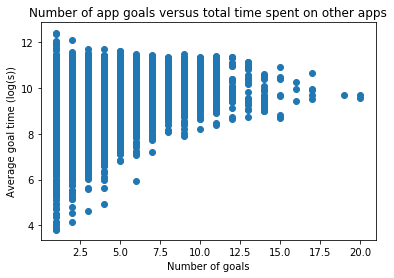

In [28]:
import matplotlib.pyplot as pyplot
import collections

most_active_users = {"": 0}
most_active_user = ""
for stat in day_stats:
    email = stat[HASH]
    if email not in most_active_users:
        most_active_users[email] = 0
    most_active_users[email] += 1
    if most_active_users[email] > most_active_users[most_active_user]:
        most_active_user = email
print(most_active_user)
pyplot.figure(43)
pyplot.title("Number of app goals versus total time spent on other apps")
pyplot.ylabel("Average goal time (log(s))")
pyplot.xlabel("Number of goals")
pyplot.scatter([len(stat[GOALS]) for stat in day_stats], [(stat[TOTAL_TIME]) for stat in day_stats])


In [29]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity +  (1|email_hash) + (1|num_goals), data = df)
summary(results)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "infreq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:67: UserWarning: Error while trying to convert the column "freq_goals". Fall back to string conversion. The error is: Conversion 'py2ri' not defined for objects of type '<class 'set'>'
  (name, str(e)))
/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: df

REML criterion at convergence: 14027.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-7.3319 -0.4435  0.1133  0.5612  3.0101 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.2674   1.1258  
 num_goals  (Intercept) 0.0109   0.1044  
 Residual               0.7319   0.8555  
Number of obs: 5006, groups:  email_hash, 567; num_goals, 19

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 8.953e+00  7.381e-02 7.042e+01   121.3   <2e-16 ***
intensity   1.365e-01  7.585e-02 4.453e+03     1.8   0.0719 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.558


In [30]:
%%R -i df -w 5 -h 5 --units in -r 200
# Does goal time spent per day on phone change depending on percentage
df$email_hash <- factor(df$email_hash,  ordered=FALSE)
results <- lmer(target_time ~ avg_goal_time + (1|email_hash), data = df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: target_time ~ avg_goal_time + (1 | email_hash)
   Data: df

REML criterion at convergence: 20041.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.8649 -0.1562 -0.0475 -0.0138  5.3093 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 2.476    1.573   
 Residual               2.581    1.606   
Number of obs: 5006, groups:  email_hash, 567

Fixed effects:
               Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)   7.245e-01  1.046e-01 1.521e+03   6.928  6.3e-12 ***
avg_goal_time 6.537e-02  3.332e-02 4.857e+03   1.962   0.0498 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
avg_goal_tm -0.706


In [31]:
# see average change for time spent in goals vs. outside of goal when freq setting changes
from statistics import mean, StatisticsError
goal_time_change_stats = []
other_time_change_stats = []
user_stats = {}
max_time = 0
for day in day_stats:
    email = day[HASH]
    if day[HASH] not in user_stats:
        user_stats[email] = {FREQ_GOALS: set([]), INFREQ_GOALS: set([])}
    user_stats[email][FREQ_GOALS] = user_stats[email][FREQ_GOALS].union(day[FREQ_GOALS])
    user_stats[email][INFREQ_GOALS] = user_stats[email][INFREQ_GOALS].union(day[INFREQ_GOALS])
    for domain_time in day:
        if "_domain_time" in domain_time:
            domain = domain_time[:-len("_domain_time")]
            if domain not in user_stats[email]:
                user_stats[email][domain] = {"frequent_goal": [], "infrequent_goal": [], "frequent_other": [], "infrequent_other": []}
            if not (domain in day[FREQ_GOALS] and domain in day[INFREQ_GOALS]):
                freq = "frequent" if domain in day[FREQ_GOALS] else "infrequent"
                if day[domain_time] > max_time:
                    max_time = day[domain_time]
                    print(max_time)
                user_stats[email][domain][freq + "_goal"].append(day[domain_time])
                user_stats[email][domain][freq+"_other"].append(day[TOTAL_TIME] - day[domain_time])
for user in user_stats:
    for domain in user_stats[user][FREQ_GOALS].intersection(user_stats[user][INFREQ_GOALS]):
        if 0 not in user_stats[user][domain]["frequent_goal"] and 0 not in user_stats[user][domain]["infrequent_goal"]:
            try:
                mean_freq_goal = mean(user_stats[user][domain]["frequent_goal"])
                # print("frequent" + str(user_stats[user][domain]["frequent_goal"]))
                # print("infrequent  " + str(user_stats[user][domain]["infrequent_goal"]))
                goal_change = mean_freq_goal - mean(user_stats[user][domain]["infrequent_goal"])
                other_change = mean(user_stats[user][domain]["frequent_other"]) - mean(user_stats[user][domain]["infrequent_other"])
                goal_time_change_stats.append(goal_change)
                other_time_change_stats.append(other_change)
            except StatisticsError:
                pass

4.3694478524670215
8.339739766019143
8.733594061863055
9.11679862756782
9.914625296946584
10.663124474364906
11.05668271897453
11.340082840810044


In [109]:
# our next data set: goal_time, freq, goal, and email_hash
goal_stats_dict = {"app": [], "email": [], "time": [], "other_time": [], "frequency": [], 'intensity_day': [], 'intensity_othergoals_day': []}
for day in day_stats:
    for key in day:
        if "domain_time" in key:
            domain = key[:-len("_domain_time")]
            if not (domain in day[FREQ_GOALS] and domain in day[INFREQ_GOALS]) and (domain in day[FREQ_GOALS] or domain in day[INFREQ_GOALS]):
                freq = "frequent" if domain in day[FREQ_GOALS] else "infrequent"
                total_num_goals = len(day[FREQ_GOALS]) + len(day[INFREQ_GOALS])
                total_num_othergoals = total_num_goals - 1
                intensity = len(day[FREQ_GOALS]) / total_num_goals
                num_freq_othergoals = len(day[FREQ_GOALS])
                if freq == 'frequent':
                    num_freq_othergoals -= 1
                goal_stats_dict['intensity_day'].append(intensity)
                if total_num_othergoals > 0:
                    intensity_othergoals = num_freq_othergoals / total_num_othergoals
                    goal_stats_dict['intensity_othergoals_day'].append(intensity_othergoals)
                else:
                    goal_stats_dict['intensity_othergoals_day'].append(-1)
                goal_stats_dict["app"].append(domain)
                goal_stats_dict["email"].append(day[HASH])
                goal_stats_dict["time"].append(day[key])
                goal_stats_dict["other_time"].append(day[GOAL_TIME] - day[key])
                goal_stats_dict["frequency"].append(freq)
goal_freq_df = pd.DataFrame(goal_stats_dict)
#goal_freq_df.to_csv("goal_freq_df.csv")

In [111]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

goal_freq_df <- subset(goal_freq_df, intensity_othergoals_day != -1)
summary(goal_freq_df)

     app               email                time          other_time       
 Length:27385       Length:27385       Min.   : 0.000   Min.   : 0.000116  
 Class :character   Class :character   1st Qu.: 4.898   1st Qu.: 1.173065  
 Mode  :character   Mode  :character   Median : 6.366   Median : 2.259344  
                                       Mean   : 6.108   Mean   : 2.618673  
                                       3rd Qu.: 7.520   3rd Qu.: 3.727062  
                                       Max.   :11.340   Max.   :11.258678  
  frequency         intensity_day    intensity_othergoals_day
 Length:27385       Min.   :0.0000   Min.   :0.0000          
 Class :character   1st Qu.:0.3333   1st Qu.:0.3333          
 Mode  :character   Median :0.5000   Median :0.5000          
                    Mean   :0.4959   Mean   :0.4960          
                    3rd Qu.:0.6667   3rd Qu.:0.6667          
                    Max.   :1.0000   Max.   :1.0000          


In [120]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-SYMBIOTIC

goal_freq_df <- subset(goal_freq_df, intensity_othergoals_day != -1)

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = goal_freq_df)
results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|app), data = goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|app) + (1|email), data = goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ intensity_othergoals_day + (1 | frequency) + (1 | app)
   Data: goal_freq_df

REML criterion at convergence: 108305.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5539 -0.5698  0.1237  0.6710  3.4793 

Random effects:
 Groups    Name        Variance Std.Dev.
 app       (Intercept) 1.812192 1.34618 
 frequency (Intercept) 0.001942 0.04407 
 Residual              2.933343 1.71270 
Number of obs: 27385, groups:  app, 727; frequency, 2

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)               5.190e+00  7.104e-02  2.126e+01  73.061   <2e-16 ***
intensity_othergoals_day -6.488e-02  3.828e-02  2.711e+04  -1.695   0.0901 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
intnsty_th_ -0.272


In [80]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
goal_freq_df$frequency <- goal_freq_df$frequency == 'frequent'
results <- t.test(goal_freq_df$time ~ goal_freq_df$frequency)
show(results)


	Welch Two Sample t-test

data:  goal_freq_df$time by goal_freq_df$frequency
t = 2.1447, df = 28343, p-value = 0.03198
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.004211949 0.093614307
sample estimates:
mean in group FALSE  mean in group TRUE 
           6.155786            6.106873 



In [71]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lm(time ~ frequency, data = goal_freq_df)
summary(results)


Call:
lm(formula = time ~ frequency, data = goal_freq_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.1558 -1.2141  0.2579  1.4182  5.1843 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.15579    0.01608 382.935   <2e-16 ***
frequencyfrequent -0.04891    0.02281  -2.145    0.032 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.92 on 28343 degrees of freedom
Multiple R-squared:  0.0001622,	Adjusted R-squared:  0.000127 
F-statistic: 4.599 on 1 and 28343 DF,  p-value: 0.032



In [70]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|app) , data = goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | app)
   Data: goal_freq_df

REML criterion at convergence: 112298.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5253 -0.5683  0.1272  0.6721  3.4678 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 1.814    1.347   
 Residual             2.957    1.720   
Number of obs: 28345, groups:  app, 733

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.194e+00  6.154e-02  6.538e+02  84.406  < 2e-16 ***
frequencyfrequent -6.971e-02  2.094e-02  2.819e+04  -3.329 0.000872 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.166


In [33]:
%%R -i goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-MOBILE-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
goal_freq_df$email <- factor(goal_freq_df$email,  ordered=FALSE)
goal_freq_df$app <- factor(goal_freq_df$app, ordered=FALSE)
goal_freq_df$frequency <- factor(goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|app) + (1|email) , data = goal_freq_df)
summary(results)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | app) + (1 | email)
   Data: goal_freq_df

REML criterion at convergence: 110148.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.1144 -0.5407  0.1294  0.6555  3.7531 

Random effects:
 Groups   Name        Variance Std.Dev.
 app      (Intercept) 1.7946   1.3396  
 email    (Intercept) 0.5152   0.7178  
 Residual             2.6325   1.6225  
Number of obs: 28345, groups:  app, 733; email, 617

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.238e+00  6.922e-02  9.457e+02  75.671  < 2e-16 ***
frequencyfrequent -6.517e-02  2.059e-02  2.814e+04  -3.165  0.00155 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.142


1461
0.4989733059548255
[-0.07416062065205994, 0.05023662886411406]


<BarContainer object of 2 artists>

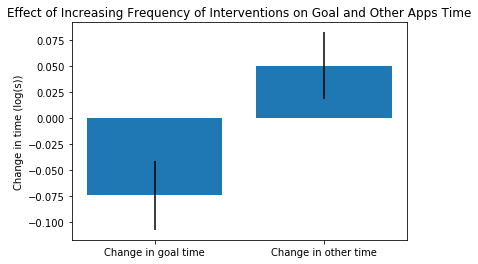

In [34]:
from scipy.stats import sem
pyplot.figure(32)
print(len(goal_time_change_stats))
pyplot.title("Effect of Increasing Frequency of Interventions on Goal and Other Apps Time")
pyplot.ylabel('Change in time (log(s))')
print(len([stat for stat in other_time_change_stats if stat > 0])/len(goal_time_change_stats))
print([mean(goal_time_change_stats), mean(other_time_change_stats)])
pyplot.bar(["Change in goal time", "Change in other time"], [mean(goal_time_change_stats), mean(other_time_change_stats)] , .8, yerr=[sem(goal_time_change_stats), sem(other_time_change_stats)])

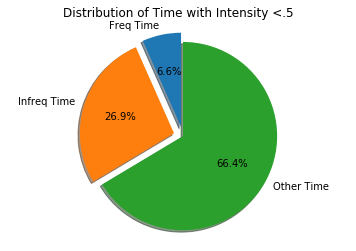

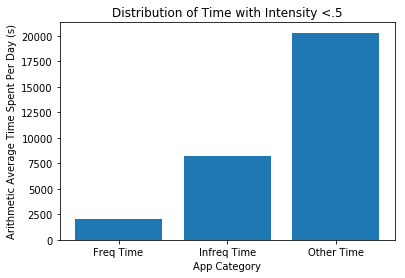

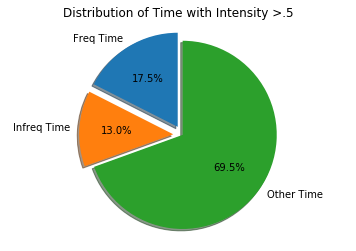

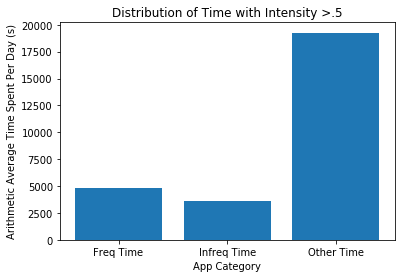

In [35]:

freq_time = [0,0]
infreq_time = [0,0]
other_time = [0,0]
num_days = [0, 0]
for day in day_stats:
    if len(day[FREQ_GOALS]) > 0 and len(day[INFREQ_GOALS]) > 0:
        intensity= len(day[FREQ_GOALS])/len(day[INFREQ_GOALS])
        if intensity <.5:
            num_days[0] += 1
            freq_time[0] += math.exp(day[FREQ_TIME])
            infreq_time[0] += math.exp(day[GOAL_TIME])-math.exp(day[FREQ_TIME])
            other_time[0] += math.exp(day[OTHER_TIME])
        elif intensity > .5:
            num_days[1] += 1
            freq_time[1] += math.exp(day[FREQ_TIME])
            infreq_time[1] += math.exp(day[GOAL_TIME])-math.exp(day[FREQ_TIME])
            other_time[1] += math.exp(day[OTHER_TIME])   
from functools import reduce
import numpy as np
for i in range(0,2):
    pyplot.figure(325 + i * 2 - 1)
    labels = 'Freq Time', 'Infreq Time', 'Other Time'
    sizes = [freq_time[i], infreq_time[i], other_time[i]]
    explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    pyplot.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")
    pyplot.figure(325 + i * 2)
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")
    pyplot.xlabel("App Category")
    pyplot.ylabel("Arithmetic Average Time Spent Per Day (s)")
    pyplot.bar(labels, list(map(lambda x: x/num_days[i], sizes)))
    pyplot.figure("Distribution of Time with Intensity")


-0.7254083780641535


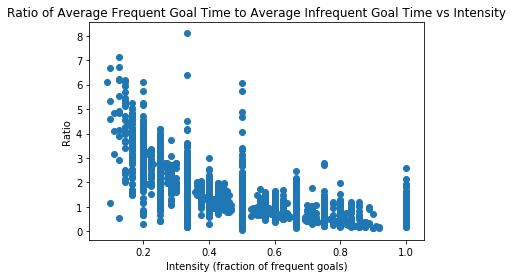

In [36]:
intensities = []
avg_freq_time = []
avg_infreq_time = []
ratio = []
for item in day_stats:
    if len(item[FREQ_GOALS]) > 0 and len(item[INFREQ_GOALS]) > 0 and math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]) > 3:
        avg_freq_time_pt = item[FREQ_TIME]/len(item[FREQ_GOALS])
        
        avg_infreq_time_pt = math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS])
        if avg_freq_time_pt/avg_infreq_time_pt > 1000:
            print(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))
            print(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME])))
            print(math.log(math.exp(item[GOAL_TIME])-math.exp(item[FREQ_TIME]))/len(item[INFREQ_GOALS]))
            print(str(avg_freq_time_pt) + " " + str(avg_infreq_time_pt))
        intensity = len(item[FREQ_GOALS])/(len(item[FREQ_GOALS].union(item[INFREQ_GOALS])))
        if avg_freq_time_pt > 0 and avg_infreq_time_pt > 0:
            intensities.append(intensity)
            avg_freq_time.append(avg_freq_time_pt)
            avg_infreq_time.append(avg_infreq_time_pt)
            ratio.append((avg_freq_time_pt/avg_infreq_time_pt))
pyplot.figure(62426)
pyplot.title("Ratio of Average Frequent Goal Time to Average Infrequent Goal Time vs Intensity")
pyplot.xlabel("Intensity (fraction of frequent goals)")
pyplot.ylabel("Ratio")
pyplot.scatter(intensities, ratio)
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(intensities,ratio)
print(r_value)

In [37]:
# Get all browser user ids that have goal frequencies collection.
print ("getting collection names")
collection_names = ext_db.list_collection_names()
print("got collection names")
browser_user_ids = []
counter = 0
for name in collection_names:
    if counter % 100000 == 0:
        print(counter)
    counter += 1
    if "goal_frequencies" in name:
        browser_user_ids.append(name[:-len("_synced:goal_frequencies")])

getting collection names
got collection names
0
100000
200000


In [38]:
print(len(browser_user_ids))

1451


In [39]:

browser_days = []
import moment
import math
from time_utils import epoch_to_date
from datetime import datetime
import time
# Now the browser side of things!!
num_browser_users = len(browser_user_ids)
counter = 0
for user in browser_user_ids:
    # Get freq settings:
    counter += 1
    if int((counter + 1)/num_browser_users * 100) > int(counter/num_browser_users * 100):
        print(str(counter/num_browser_users * 100) + "%")
    user_stats = get_freq_stats(user)
    if len(user_stats) == 0:
        continue
    browser_day_map = {}
    for day_stat in ext_db[user+ "_synced:seconds_on_domain_per_day"].find({"key2":{"$gt": 930}}):
        # The key1 serves as a day. However, if we are going to compare same day stuffs for android.
        # We need to instead build day string from moment
        day = epoch_to_date(int(day_stat['key2']))
        if day not in browser_day_map:
            browser_day_map[day] = {}
        goal = get_name(day_stat['key'], BROWSER_DOMAIN)
        if goal:
            if goal + "_domain_time" not in browser_day_map or day_stat["val"] > browser_day_map[goal + "_domain_time"]:
                browser_day_map[day][goal + "_domain_time"] = day_stat["val"]
    for day in browser_day_map:
        day_data = { FREQ_TIME: 0, INFREQ_TIME: 0, INTENSITY: 0, INFREQ_GOALS: set([]),  TOTAL_TIME: 0, GOAL_TIME: 0, HASH:user, GOALS: set([]), FREQ_GOALS: set([]), OTHER_TIME: 0, GOAL_TIMES: []}
        # weirdly enough, datetime timestamps are seconds, not ms.
        isoWeek = str(datetime.fromtimestamp(moment.date(day).epoch() + 8 * (60 ** 2)).isocalendar()[1])
        # Add obj and reset data
        # take logs of time cuz time is log-norm distributed
        # First, count up all domain_times into TOTAL, GOAL, and OTHER
        if isoWeek not in user_stats:
            continue
        day_data[FREQ_GOALS] = user_stats[isoWeek][FREQ_GOALS]
        day_data[INFREQ_GOALS] = user_stats[isoWeek][INFREQ_GOALS]
        day_data[GOALS] = day_data[FREQ_GOALS].union(day_data[INFREQ_GOALS])
        if len(user_stats[isoWeek][FREQ_GOALS].intersection(user_stats[isoWeek][INFREQ_GOALS])) > 0:
            continue
        for key in browser_day_map[day]:
            if "_domain_time" in key:
                key_goal = key[:-len("_domain_time")]
                day_data[TOTAL_TIME] += int(browser_day_map[day][key])
                if key_goal in day_data[FREQ_GOALS] or key_goal in day_data[INFREQ_GOALS]:
                    frequent = "frequent" if key_goal in day_data[FREQ_GOALS] else "infrequent"
                    if key_goal in day_data[FREQ_GOALS]:
                        day_data[FREQ_TIME] += browser_day_map[day][key]
                    else:
                        day_data[INFREQ_TIME] += browser_day_map[day][key]
                    day_data[GOAL_TIMES].append({"frequency": frequent, "goal": key_goal, "time": browser_day_map[day][key]})
                    day_data[GOAL_TIME] += browser_day_map[day][key]
                else:
                    day_data[OTHER_TIME] += browser_day_map[day][key]
        for key in day_data:
            if "time" in key and day_data[key] > 0:
                day_data[key]= math.log(day_data[key])
        if len(day_data[FREQ_GOALS]) > 0 and len(day_data[INFREQ_GOALS]) > 0:
            day_data[AVG_FREQ_TIME] = day_data[FREQ_TIME]/len(day_data[FREQ_GOALS])
            day_data[AVG_INFREQ_TIME] = day_data[INFREQ_TIME]/len(day_data[INFREQ_GOALS])
            for goal_time in day_data[GOAL_TIMES]:
                    if goal_time[TIME] > 0:
                        goal_time[TIME] = math.log(goal_time[TIME])
            if len(day_data[FREQ_GOALS])+ len(day_data[INFREQ_GOALS]) > 0:
                day_data[INTENSITY] = len(day_data[FREQ_GOALS])/(len(day_data[FREQ_GOALS])+ len(day_data[INFREQ_GOALS]))
                browser_days.append(day_data)



0.9648518263266712%
1.9986216402481045%
2.963473466574776%
3.997243280496209%
4.962095106822881%
5.995864920744314%
6.960716747070986%
7.994486560992418%
8.959338387319091%
9.993108201240524%
10.957960027567196%
11.991729841488628%
12.9565816678153%
13.990351481736733%
14.955203308063405%
15.988973121984836%
16.95382494831151%
17.98759476223294%
18.952446588559614%
19.98621640248105%
20.951068228807717%
21.98483804272915%
22.949689869055824%
23.983459682977255%
24.948311509303927%
25.982081323225366%
26.94693314955203%
27.980702963473465%
28.945554789800138%
29.97932460372157%
30.94417643004824%
31.977946243969672%
32.94279807029635%
33.97656788421778%
34.94141971054445%
35.97518952446588%
36.940041350792555%
37.973811164713986%
38.938662991040665%
39.9724328049621%
40.93728463128877%
41.9710544452102%
42.93590627153687%
43.9696760854583%
44.934527911784976%
45.96829772570641%
46.93314955203308%
47.96691936595451%
48.93177119228119%
49.96554100620262%
50.99931082012405%
51.964162646450

In [121]:
import pandas as pd
# Dataframe to find effect of frequency on goal times
browser_goal_freq_dict = {HASH: [], TIME: [], GOAL: [], FREQUENCY: [], 'intensity_othergoals_day': []}
for day in browser_days:
    total_num_goals = len(day[GOAL_TIMES])
    total_num_othergoals = total_num_goals - 1
    total_num_freq_goals = 0
    for goal_time in day[GOAL_TIMES]:
        if goal_time[FREQUENCY] == 'frequent':
            total_num_freq_goals += 1
    for goal_time in day[GOAL_TIMES]:
        browser_goal_freq_dict[HASH].append(day[HASH])
        browser_goal_freq_dict[FREQUENCY].append(goal_time[FREQUENCY])
        browser_goal_freq_dict[TIME].append(goal_time[TIME])
        browser_goal_freq_dict[GOAL].append(goal_time[GOAL])
        total_num_freq_othergoals = total_num_freq_goals
        if goal_time[FREQUENCY] == 'frequent':
            total_num_freq_othergoals -= 1
        if total_num_othergoals > 0:
            intensity_othergoals = total_num_freq_othergoals / total_num_othergoals
        else:
            intensity_othergoals = -1
        browser_goal_freq_dict['intensity_othergoals_day'].append(intensity_othergoals)

browser_goal_freq_df = pd.DataFrame(browser_goal_freq_dict)
print(browser_goal_freq_df)
browser_goal_freq_df.to_csv("2018-09-10-browser_goal_freq_df.csv")

                     email_hash      time       goal   frequency  \
0      883c1ba5c4e5472d2f8067d6  6.188264   facebook    frequent   
1      d49e6ce9c7fadc10f3baf7bd  1.609438        www    frequent   
2      d49e6ce9c7fadc10f3baf7bd  5.609472        www    frequent   
3      d49e6ce9c7fadc10f3baf7bd  6.045005        www    frequent   
4      601ef212e501d1cdccebf63b  7.918992   facebook  infrequent   
5      601ef212e501d1cdccebf63b  7.379632    twitter    frequent   
6      601ef212e501d1cdccebf63b  5.971262     amazon  infrequent   
7      601ef212e501d1cdccebf63b  8.535033   facebook  infrequent   
8      601ef212e501d1cdccebf63b  7.591357    twitter    frequent   
9      9e63d7e9d250c795b9c657e8  3.761200    twitter  infrequent   
10     9e63d7e9d250c795b9c657e8  5.697093   facebook  infrequent   
11     9e63d7e9d250c795b9c657e8  6.744059     reddit    frequent   
12     9e63d7e9d250c795b9c657e8  7.817625    youtube    frequent   
13     9e63d7e9d250c795b9c657e8  6.028279   face

In [41]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

library(lme4)
library(sjPlot)
library(lmerTest)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


In [127]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df <- subset(browser_goal_freq_df, intensity_othergoals_day != -1)

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube' | goal == 'facebook')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|goal), data = browser_goal_freq_df)
#results <- lmer(time ~ intensity_othergoals_day + (1|frequency) + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ intensity_othergoals_day + (1 | frequency)
   Data: browser_goal_freq_df

REML criterion at convergence: 27862.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.4406 -0.5758  0.1399  0.7104  2.8112 

Random effects:
 Groups    Name        Variance Std.Dev.
 frequency (Intercept) 0.01467  0.1211  
 Residual              3.27741  1.8104  
Number of obs: 6920, groups:  frequency, 2

Fixed effects:
                           Estimate Std. Error         df t value Pr(>|t|)   
(Intercept)                 6.14638    0.09327    1.20379  65.900  0.00434 **
intensity_othergoals_day   -0.06871    0.06144 2989.14653  -1.118  0.26355   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
intnsty_th_ -0.320


In [42]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube' | goal == 'facebook')
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | email_hash) + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 31895.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2364 -0.5122  0.1533  0.6598  2.9087 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.85587  0.9251  
 goal       (Intercept) 0.07203  0.2684  
 Residual               2.56266  1.6008  
Number of obs: 8142, groups:  email_hash, 944; goal, 2

Fixed effects:
                   Estimate Std. Error        df t value Pr(>|t|)   
(Intercept)          5.9685     0.1945    1.0809  30.684   0.0160 * 
frequencyfrequent   -0.1087     0.0397 8114.2746  -2.738   0.0062 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.103


In [43]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'youtube')
#browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | email_hash)
   Data: browser_goal_freq_df

REML criterion at convergence: 15619.1

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.2518 -0.4923  0.1372  0.6273  2.8089 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.424    1.193   
 Residual               2.567    1.602   
Number of obs: 3889, groups:  email_hash, 783

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)          6.17508    0.06413 1113.33290  96.292  < 2e-16 ***
frequencyfrequent   -0.23198    0.06914 3667.15713  -3.355 0.000801 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.556


In [44]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df <- subset(browser_goal_freq_df, goal == 'facebook')
#browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | email_hash)
   Data: browser_goal_freq_df

REML criterion at convergence: 15373

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.8890 -0.4770  0.1496  0.6003  3.1237 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 1.365    1.169   
 Residual               1.639    1.280   
Number of obs: 4253, groups:  email_hash, 788

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)          5.62389    0.05525  978.41458 101.788   <2e-16 ***
frequencyfrequent   -0.05357    0.05430 4224.11003  -0.987    0.324    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.479


In [45]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | email_hash) + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 63775.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5869 -0.5137  0.1457  0.6675  2.9528 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5711   0.7557  
 goal       (Intercept) 0.5681   0.7537  
 Residual               2.4803   1.5749  
Number of obs: 16571, groups:  email_hash, 1003; goal, 410

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.346e+00  6.206e-02  5.134e+02  86.137   <2e-16 ***
frequencyfrequent -8.522e-02  2.611e-02  1.625e+04  -3.264   0.0011 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.213


In [79]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- browser_goal_freq_df$frequency == 'frequent'
results <- t.test(browser_goal_freq_df$time ~ browser_goal_freq_df$frequency)
show(results)
#summary(browser_goal_freq_df)


	Welch Two Sample t-test

data:  browser_goal_freq_df$time by browser_goal_freq_df$frequency
t = 3.363, df = 16559, p-value = 0.0007728
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 0.03892902 0.14771184
sample estimates:
mean in group FALSE  mean in group TRUE 
           5.820614            5.727293 



In [73]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lm(time ~ frequency, data = browser_goal_freq_df)
summary(results)


Call:
lm(formula = time ~ frequency, data = browser_goal_freq_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.8206 -1.0359  0.2004  1.2602  5.3572 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)        5.82061    0.01964 296.377  < 2e-16 ***
frequencyfrequent -0.09332    0.02775  -3.363 0.000772 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.786 on 16569 degrees of freedom
Multiple R-squared:  0.0006822,	Adjusted R-squared:  0.0006219 
F-statistic: 11.31 on 1 and 16569 DF,  p-value: 0.0007724



In [72]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 65141.2

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.7192 -0.5419  0.1483  0.6917  2.8407 

Random effects:
 Groups   Name        Variance Std.Dev.
 goal     (Intercept) 0.7286   0.8536  
 Residual             2.9031   1.7038  
Number of obs: 16571, groups:  goal, 410

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.323e+00  5.779e-02  3.607e+02  92.103  < 2e-16 ***
frequencyfrequent -9.259e-02  2.713e-02  1.657e+04  -3.413 0.000643 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.238


In [46]:
%%R -i browser_goal_freq_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-BROWSER-REDUCED: time on site is reduced on days where the goal is frequent

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_goal_freq_df$email_hash <- factor(browser_goal_freq_df$email_hash,  ordered=FALSE)
browser_goal_freq_df$goal <- factor(browser_goal_freq_df$goal, ordered=FALSE)
browser_goal_freq_df$frequency <- factor(browser_goal_freq_df$frequency, levels=c("infrequent", "frequent"))
results <- lmer(time ~ frequency + (1|email_hash) + (1|goal), data = browser_goal_freq_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: time ~ frequency + (1 | email_hash) + (1 | goal)
   Data: browser_goal_freq_df

REML criterion at convergence: 63775.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.5869 -0.5137  0.1457  0.6675  2.9528 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.5711   0.7557  
 goal       (Intercept) 0.5681   0.7537  
 Residual               2.4803   1.5749  
Number of obs: 16571, groups:  email_hash, 1003; goal, 410

Fixed effects:
                    Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)        5.346e+00  6.206e-02  5.134e+02  86.137   <2e-16 ***
frequencyfrequent -8.522e-02  2.611e-02  1.625e+04  -3.264   0.0011 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
            (Intr)
frqncyfrqnt -0.213


In [47]:
#print(time)

In [48]:
FREQ_FRAC_TIME = "freq_frac_time"
INFREQ_FRAC_TIME = "infreq_frac_time"
AVG_GOAL_TIME= "avg_goal_time"
intensity_dict ={INTENSITY: [], HASH: [], TOTAL_TIME: [], GOAL_TIME: [], OTHER_TIME: [], AVG_GOAL_TIME: [],
                AVG_FREQ_TIME: [], FREQ_FRAC_TIME: [], INFREQ_FRAC_TIME: [], AVG_INFREQ_TIME: [], NUM_FREQ_GOALS: [], NUM_INFREQ_GOALS: [], NUM_GOALS: []}
for day in browser_days:
    for key in intensity_dict:
        if key not in [AVG_GOAL_TIME, NUM_FREQ_GOALS, NUM_INFREQ_GOALS, NUM_GOALS, FREQ_FRAC_TIME, INFREQ_FRAC_TIME]:
            intensity_dict[key].append(day[key])
    intensity_dict[NUM_FREQ_GOALS].append(len(day[FREQ_GOALS]))
    intensity_dict[NUM_INFREQ_GOALS].append(len(day[INFREQ_GOALS]))
    intensity_dict[AVG_GOAL_TIME].append(day[GOAL_TIME]/len(day[GOALS]))
    intensity_dict[NUM_GOALS].append(len(day[FREQ_GOALS].union(day[INFREQ_GOALS])))
    intensity_dict[FREQ_FRAC_TIME].append(math.exp(day[FREQ_TIME])/math.exp(day[TOTAL_TIME]))
    intensity_dict[INFREQ_FRAC_TIME].append(math.exp(day[INFREQ_TIME])/math.exp(day[TOTAL_TIME]))
browser_df = pd.DataFrame(intensity_dict)
browser_df.to_csv("2018-09-10-browser_intensity_on_time.csv")
print(browser_df)

      intensity                email_hash  total_time  goal_time  other_time  \
0      0.500000  883c1ba5c4e5472d2f8067d6    7.105786   6.188264    6.595781   
1      0.750000  d49e6ce9c7fadc10f3baf7bd    6.788972   0.000000    6.788972   
2      0.250000  d49e6ce9c7fadc10f3baf7bd    5.192957   0.000000    5.192957   
3      0.250000  d49e6ce9c7fadc10f3baf7bd    8.071531   0.000000    8.071531   
4      0.800000  d49e6ce9c7fadc10f3baf7bd    4.521789   1.609438    4.465908   
5      0.800000  d49e6ce9c7fadc10f3baf7bd    6.942157   5.609472    6.635947   
6      0.800000  d49e6ce9c7fadc10f3baf7bd    8.114025   6.045005    7.978996   
7      0.333333  601ef212e501d1cdccebf63b    9.316950   8.464636    8.761080   
8      0.333333  601ef212e501d1cdccebf63b    9.791606   8.863757    9.288412   
9      0.400000  9e63d7e9d250c795b9c657e8    8.311398   7.081709    7.965546   
10     0.400000  9e63d7e9d250c795b9c657e8    9.235521   8.459140    8.619208   
11     0.400000  9e63d7e9d250c795b9c657e

In [49]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash) + (1|num_goals), data = browser_df)
summary(results)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: browser_df

REML criterion at convergence: 33204.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9883 -0.3142  0.1832  0.5436  2.8099 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.1666   1.7795  
 num_goals  (Intercept) 0.1471   0.3835  
 Residual               4.1098   2.0273  
Number of obs: 7396, groups:  email_hash, 1018; num_goals, 15

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 6.301e+00  1.802e-01 1.959e+01  34.960   <2e-16 ***
intensity   5.293e-02  1.976e-01 7.388e+03   0.268    0.789    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.553


In [83]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-FREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_freq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_freq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9027 -2.2585 -0.2014  1.5346  8.2729 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.19283    0.09696   43.24   <2e-16 ***
intensity   -2.90144    0.18635  -15.57   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.5 on 7394 degrees of freedom
Multiple R-squared:  0.03175,	Adjusted R-squared:  0.03161 
F-statistic: 242.4 on 1 and 7394 DF,  p-value: < 2.2e-16



In [62]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-FREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 31858.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5332 -0.5282  0.0223  0.5107  4.1011 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.170    1.780   
 Residual               3.356    1.832   
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    4.0315     0.1087 4583.2469   37.08   <2e-16 ***
intensity     -2.4718     0.1800 7344.4179  -13.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.822


In [82]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-INFREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_infreq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_infreq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6927 -2.3563 -0.2078  1.4547  7.5780 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.57020    0.09623   16.32   <2e-16 ***
intensity    2.35829    0.18495   12.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.481 on 7394 degrees of freedom
Multiple R-squared:  0.02152,	Adjusted R-squared:  0.02138 
F-statistic: 162.6 on 1 and 7394 DF,  p-value: < 2.2e-16



In [63]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-INFREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 31581

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1916 -0.5039  0.0183  0.5009  3.9937 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.428    1.851   
 Residual               3.185    1.785   
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    1.6189     0.1083 4375.6060   14.95   <2e-16 ***
intensity      2.4482     0.1763 7299.1912   13.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.809


In [87]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

summary(df)

 productive_time  unproductive_time   intensity       infreq_goals      
 Min.   : 0.000   Min.   : 0.000    Min.   :0.09091   Length:5006       
 1st Qu.: 4.248   1st Qu.: 7.729    1st Qu.:0.37500   Class :character  
 Median : 6.170   Median : 8.668    Median :0.50000   Mode  :character  
 Mean   : 5.914   Mean   : 8.379    Mean   :0.52016                     
 3rd Qu.: 7.977   3rd Qu.: 9.429    3rd Qu.:0.66667                     
 Max.   :11.628   Max.   :11.436    Max.   :1.00000                     
                                                                        
  target_time        freq_time        total_time       goal_time     
 Min.   : 0.0000   Min.   : 0.000   Min.   : 4.159   Min.   : 2.303  
 1st Qu.: 0.0000   1st Qu.: 6.660   1st Qu.: 9.336   1st Qu.: 8.042  
 Median : 0.0000   Median : 7.782   Median : 9.961   Median : 8.745  
 Mean   : 0.9446   Mean   : 7.457   Mean   : 9.880   Mean   : 8.608  
 3rd Qu.: 0.0000   3rd Qu.: 8.592   3rd Qu.:10.618   3rd Qu.: 9.33

In [91]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-FREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_freq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_freq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.9027 -2.2585 -0.2014  1.5346  8.2729 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  4.19283    0.09696   43.24   <2e-16 ***
intensity   -2.90144    0.18635  -15.57   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.5 on 7394 degrees of freedom
Multiple R-squared:  0.03175,	Adjusted R-squared:  0.03161 
F-statistic: 242.4 on 1 and 7394 DF,  p-value: < 2.2e-16



In [90]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-INFREQGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_infreq_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_infreq_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.6927 -2.3563 -0.2078  1.4547  7.5780 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.57020    0.09623   16.32   <2e-16 ***
intensity    2.35829    0.18495   12.75   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.481 on 7394 degrees of freedom
Multiple R-squared:  0.02152,	Adjusted R-squared:  0.02138 
F-statistic: 162.6 on 1 and 7394 DF,  p-value: < 2.2e-16



In [97]:
%%R -i browser_df -w 5 -h 5 --units in -r 200


summary(browser_df)

/home/geza/.local/lib/python3.6/site-packages/rpy2/robjects/pandas2ri.py:191: FutureWarning: from_items is deprecated. Please use DataFrame.from_dict(dict(items), ...) instead. DataFrame.from_dict(OrderedDict(items)) may be used to preserve the key order.
  res = PandasDataFrame.from_items(items)


   intensity       email_hash          total_time       goal_time     
 Min.   :0.1000   Length:7396        Min.   : 0.000   Min.   : 0.000  
 1st Qu.:0.3333   Class :character   1st Qu.: 7.842   1st Qu.: 5.421  
 Median :0.5000   Mode  :character   Median : 8.689   Median : 7.009  
 Mean   :0.4964                      Mean   : 8.385   Mean   : 6.202  
 3rd Qu.:0.6000                      3rd Qu.: 9.271   3rd Qu.: 8.003  
 Max.   :0.9000                      Max.   :11.210   Max.   :11.191  
   other_time     avg_goal_time   avg_freq_time    freq_frac_time     
 Min.   : 0.000   Min.   :0.000   Min.   : 0.000   Min.   :0.0000288  
 1st Qu.: 7.293   1st Qu.:1.035   1st Qu.: 0.000   1st Qu.:0.0019128  
 Median : 8.252   Median :1.707   Median : 2.301   Median :0.0570823  
 Mean   : 7.856   Mean   :1.806   Mean   : 2.753   Mean   :0.1456084  
 3rd Qu.: 8.897   3rd Qu.:2.496   3rd Qu.: 4.254   3rd Qu.:0.2048092  
 Max.   :11.077   Max.   :5.507   Max.   :11.015   Max.   :1.0000000  
 infre

In [102]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 33225.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.9732 -0.3143  0.1842  0.5459  2.8096 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.285    1.812   
 Residual               4.112    2.028   
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept) 6.061e+00  1.172e-01 4.801e+03  51.726   <2e-16 ***
intensity   6.452e-02  1.977e-01 7.382e+03   0.326    0.744    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.838


In [101]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 17846

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5068 -0.2842  0.0718  0.4253  4.2071 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.9508   0.9751  
 Residual               0.4598   0.6781  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    1.90806    0.04686 3402.62191  40.718   <2e-16 ***
intensity     -0.03016    0.06847 7018.06161  -0.441     0.66    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.726


In [98]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_goal_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_goal_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8643 -0.7705 -0.1002  0.6930  3.7018 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.87889    0.04452   42.20   <2e-16 ***
intensity   -0.14634    0.08557   -1.71   0.0873 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.148 on 7394 degrees of freedom
Multiple R-squared:  0.0003954,	Adjusted R-squared:  0.0002602 
F-statistic: 2.925 on 1 and 7394 DF,  p-value: 0.08727



In [99]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(goal_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = goal_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.3472 -0.7902  0.7916  1.8018  4.9753 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   6.3838     0.1044  61.125   <2e-16 ***
intensity    -0.3661     0.2007  -1.824   0.0682 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.693 on 7394 degrees of freedom
Multiple R-squared:  0.0004498,	Adjusted R-squared:  0.0003146 
F-statistic: 3.327 on 1 and 7394 DF,  p-value: 0.06819



In [85]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lm(avg_goal_time ~ intensity, data = browser_df)
summary(results)


Call:
lm(formula = avg_goal_time ~ intensity, data = browser_df)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.8643 -0.7705 -0.1002  0.6930  3.7018 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  1.87889    0.04452   42.20   <2e-16 ***
intensity   -0.14634    0.08557   -1.71   0.0873 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.148 on 7394 degrees of freedom
Multiple R-squared:  0.0003954,	Adjusted R-squared:  0.0002602 
F-statistic: 2.925 on 1 and 7394 DF,  p-value: 0.08727



In [64]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED-ALLGOALS

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 17846

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5068 -0.2842  0.0718  0.4253  4.2071 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.9508   0.9751  
 Residual               0.4598   0.6781  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    1.90806    0.04686 3402.62191  40.718   <2e-16 ***
intensity     -0.03016    0.06847 7018.06161  -0.441     0.66    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.726


In [51]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(other_time ~ intensity + (1|email_hash) + (1|num_goals), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: other_time ~ intensity + (1 | email_hash) + (1 | num_goals)
   Data: browser_df

REML criterion at convergence: 27166

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.9426 -0.2862  0.1853  0.5497  2.5937 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.8838   0.9401  
 num_goals  (Intercept) 0.0000   0.0000  
 Residual               1.9169   1.3845  
Number of obs: 7396, groups:  email_hash, 1018; num_goals, 15

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    7.78500    0.07397 4801.89529 105.252   <2e-16 ***
intensity     -0.05729    0.13090 7273.31500  -0.438    0.662    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.879


In [52]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 17846

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5068 -0.2842  0.0718  0.4253  4.2071 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.9508   0.9751  
 Residual               0.4598   0.6781  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    1.90806    0.04686 3402.62191  40.718   <2e-16 ***
intensity     -0.03016    0.06847 7018.06161  -0.441     0.66    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.726


In [53]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_goal_time ~  intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_goal_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 17846

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-5.5068 -0.2842  0.0718  0.4253  4.2071 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.9508   0.9751  
 Residual               0.4598   0.6781  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)    1.90806    0.04686 3402.62191  40.718   <2e-16 ***
intensity     -0.03016    0.06847 7018.06161  -0.441     0.66    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.726


In [ ]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

In [54]:
%%R -i browser_df -w 5 -h 5 --units in -r 200

# goodresult RESULT-INTENSITY-BROWSER-REDUCED

# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_freq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_freq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 31858.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5332 -0.5282  0.0223  0.5107  4.1011 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.170    1.780   
 Residual               3.356    1.832   
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    4.0315     0.1087 4583.2469   37.08   <2e-16 ***
intensity     -2.4718     0.1800 7344.4179  -13.73   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.822


In [55]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(avg_infreq_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: avg_infreq_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: 31581

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-4.1916 -0.5039  0.0183  0.5009  3.9937 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 3.428    1.851   
 Residual               3.185    1.785   
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
             Estimate Std. Error        df t value Pr(>|t|)    
(Intercept)    1.6189     0.1083 4375.6060   14.95   <2e-16 ***
intensity      2.4482     0.1763 7299.1912   13.88   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.809


In [56]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(freq_frac_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: freq_frac_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: -3980.9

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-2.8623 -0.4978 -0.1986  0.2434  5.2688 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.01375  0.1173  
 Residual               0.02824  0.1680  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept) -6.061e-03  9.043e-03  4.870e+03   -0.67    0.503    
intensity    3.061e-01  1.594e-02  7.309e+03   19.20   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.875


In [57]:
%%R -i browser_df -w 5 -h 5 --units in -r 200
# Does non-goal time spent per day on phone inversely depend on goal-time?
browser_df$email_hash <- factor(browser_df$email_hash,  ordered=FALSE)
results <- lmer(infreq_frac_time ~ intensity + (1|email_hash), data = browser_df)
summary(results)

Linear mixed model fit by REML. t-tests use Satterthwaite's method [
lmerModLmerTest]
Formula: infreq_frac_time ~ intensity + (1 | email_hash)
   Data: browser_df

REML criterion at convergence: -4059.3

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-3.5223 -0.4850 -0.1811  0.2687  5.4357 

Random effects:
 Groups     Name        Variance Std.Dev.
 email_hash (Intercept) 0.01710  0.1308  
 Residual               0.02724  0.1650  
Number of obs: 7396, groups:  email_hash, 1018

Fixed effects:
              Estimate Std. Error         df t value Pr(>|t|)    
(Intercept)  3.150e-01  9.199e-03  4.783e+03   34.24   <2e-16 ***
intensity   -3.143e-01  1.589e-02  7.388e+03  -19.78   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Correlation of Fixed Effects:
          (Intr)
intensity -0.858


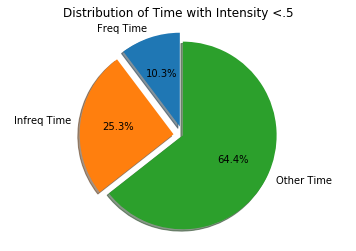

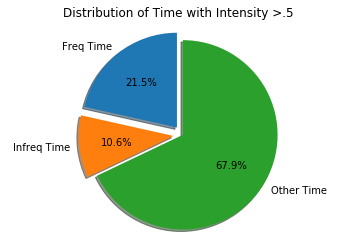

In [58]:

freq_time = [0,0]
infreq_time = [0,0]
other_time = [0,0]
for day in browser_days:
    if day[INTENSITY] <.5:
        freq_time[0] += math.exp(day[FREQ_TIME])
        infreq_time[0] += math.exp(day[INFREQ_TIME])
        other_time[0] += math.exp(day[OTHER_TIME])
    elif day[INTENSITY] > .5:
        freq_time[1] += math.exp(day[FREQ_TIME])
        infreq_time[1] += math.exp(day[INFREQ_TIME])
        other_time[1] += math.exp(day[OTHER_TIME])   
for i in range(0,2):
    pyplot.figure(765 + i)
    labels = 'Freq Time', 'Infreq Time', 'Other Time'
    sizes = [freq_time[i], infreq_time[i], other_time[i]]
    explode = (0.1, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')
    pyplot.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
            shadow=True, startangle=90)
    pyplot.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    pyplot.title("Distribution of Time with Intensity " + ("<" if i == 0 else ">") + ".5")

-0.5896299050985784


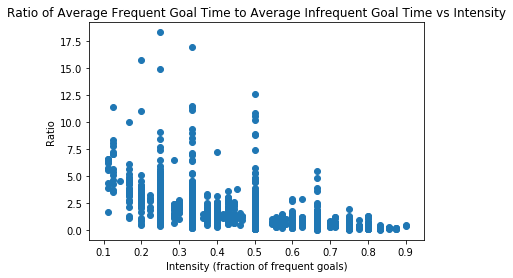

In [59]:
intensities = []
avg_freq_time = []
avg_infreq_time = []
ratio = []
from scipy import stats
for item in browser_days:
    if item[AVG_INFREQ_TIME] > 0 and item[AVG_FREQ_TIME] > 0:
        intensities.append(item[INTENSITY])
        avg_freq_time.append(item[AVG_FREQ_TIME])
        avg_infreq_time.append(item[AVG_INFREQ_TIME])
        ratio.append(item[AVG_FREQ_TIME]/item[AVG_INFREQ_TIME])
pyplot.figure(6246)
pyplot.title("Ratio of Average Frequent Goal Time to Average Infrequent Goal Time vs Intensity")
pyplot.xlabel("Intensity (fraction of frequent goals)")
pyplot.ylabel("Ratio")
pyplot.scatter(intensities, ratio)
slope, intercept, r_value, p_value, std_err = stats.linregress(intensities,ratio)
print(r_value)

<BarContainer object of 2 artists>

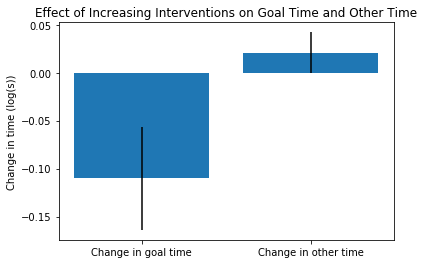

In [60]:
# Now let's try to generate that graph we made for Android -> change in time when goal changes frequency setting
user_goal_freq_avg = {}
for day in browser_days:
    user = day[HASH]
    if user not in user_goal_freq_avg:
        user_goal_freq_avg[user] = {}
    for goal_data in day[GOAL_TIMES]:
        if goal_data['goal'] != "www":
            if goal not in user_goal_freq_avg[user]:
                user_goal_freq_avg[user][goal] = {"time": {"frequent": [], "infrequent": []}, "other": {"frequent": [], "infrequent": []}}
            if (math.exp(day[TOTAL_TIME]) - math.exp(goal_data["time"])) > 0:
                user_goal_freq_avg[user][goal]["time"][goal_data["frequency"]].append(goal_data["time"])
                user_goal_freq_avg[user][goal]["other"][goal_data["frequency"]].append(math.log(math.exp(day[TOTAL_TIME]) - math.exp(goal_data["time"])))
change_in_goal_time = []
change_in_other_time = []
for user in user_goal_freq_avg:
    for goal in user_goal_freq_avg[user]:
        goal_data = user_goal_freq_avg[user][goal]
        if len(goal_data["time"]["frequent"]) > 0 and len(goal_data["time"]["infrequent"]) > 0:
            mean_freq_time = mean(goal_data["time"]["frequent"])
            mean_infreq_time = mean(goal_data["time"]["infrequent"])
            mean_freq_other = mean(goal_data["other"]["frequent"])
            mean_infreq_other = mean(goal_data["other"]["infrequent"])
            change_in_goal_time.append(mean_freq_time - mean_infreq_time)
            change_in_other_time.append(mean_freq_other - mean_infreq_other)
pyplot.title("Effect of Increasing Interventions on Goal Time and Other Time")
pyplot.ylabel("Change in time (log(s))")
pyplot.bar(["Change in goal time", "Change in other time"], [(mean(change_in_goal_time)), mean(change_in_other_time)] , .8, yerr=[sem(change_in_goal_time), sem(change_in_other_time)])
    